In [2]:
import geopandas as gpd
import pyogrio as ogr
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Point, Polygon
import pandas as pd
import requests
import networkx as nx
import osmnx as ox
import h3
import libpysal as lps

In [3]:
mh_buildings = requests.get(
    "https://data.cityofnewyork.us/resource/bsin-59hv.json?$where=BoroCD='109'"
).json()

In [4]:
mh_buildings

[{'the_geom': {'type': 'Point',
   'coordinates': [-73.96568703155472, 40.80395345347016]},
  'bin': '1056904.0',
  'bbl': '1018820008',
  'borough': '1',
  'block': '1882',
  'lot': '8',
  'address': '535 CATHEDRAL PARKWAY',
  'z_grade': '110.091',
  'z_floor': '113.309',
  'subgrade': 'N',
  'notes1': 'Property not Visible Due to Construction or Obstruction',
  'notes2': 'Fully Enclosed Ground floor for Apartment Lobby, Parking, or Access (includes sites with visible flood vents)',
  'x': '993749.492472',
  'y': '232180.807342',
  'latitude': '40.80395345',
  'longitude': '-73.96568703',
  'pluto_bbl': '1018820008.0',
  'council': '7',
  'borocd': '109',
  'ctlabel': '199',
  'boroct2020': '1019900',
  'nta2020': 'MN0901',
  'ntaname': 'Morningside Heights',
  'cdta2020': 'MN09',
  'cdtaname': 'MN09 Morningside Heights-Hamilton Heights (CD 9 Equivalent)'},
 {'the_geom': {'type': 'Point',
   'coordinates': [-73.96362743543109, 40.80507213998096]},
  'bin': '1057003.0',
  'bbl': '10188

In [5]:
df_buildings=pd.DataFrame(mh_buildings)

In [6]:
df_buildings

the_geom        bin         bbl  \
0    {'type': 'Point', 'coordinates': [-73.96568703...  1056904.0  1018820008   
1    {'type': 'Point', 'coordinates': [-73.96362743...  1057003.0  1018840043   
2    {'type': 'Point', 'coordinates': [-73.96459507...  1057049.0  1018850061   
3    {'type': 'Point', 'coordinates': [-73.96399972...  1056981.0  1018830042   
4    {'type': 'Point', 'coordinates': [-73.96338311...  1056997.0  1018840029   
..                                                 ...        ...         ...   
995  {'type': 'Point', 'coordinates': [-73.94990420...  1062426.0  1020940040   
996  {'type': 'Point', 'coordinates': [-73.94514931...  1061356.0  1020600040   
997  {'type': 'Point', 'coordinates': [-73.94621310...  1062172.0  1020820120   
998  {'type': 'Point', 'coordinates': [-73.94686948...  1062045.0  1020800042   
999  {'type': 'Point', 'coordinates': [-73.95690113...  1079731.0  1019820047   

    borough block  lot                address  z_grade  z_floor subgrade  ...  \
0         1  1882    8  535 CATHEDRAL PARKWAY  110.091  113.309        N  ...   
1         1  1884   43    526 WEST 113 STREET  121.829  125.729        Y  ...   
2         1  1885   61          2910 BROADWAY  120.323  131.146        Y  ...   
3         1  1883   42    512 WEST 112 STREET  122.795   126.47        Y  ...   
4         1  1884   29  1060 AMSTERDAM AVENUE  122.702   122.91        N  ...   
..      ...   ...  ...                    ...      ...      ...      ...  ...   
995       1  2094   40    616 WEST 148 STREET   85.313   95.107        Y  ...   
996       1  2060   40    410 WEST 146 STREET   83.382    95.07        Y  ...   
997       1  2082  120    521 WEST 150 STREET  119.492  129.272        Y  ...   
998       1  2080   42    522 WEST 149 STREET   120.82  130.697        Y  ...   
999       1  1982   47    540 WEST 126 STREET   32.551    33.32        N  ...   

        pluto_bbl council borocd ctlabel boroct2020 nta2020  \
0    1018820008.0       7    109     199    1019900  MN0901   
1    1018840043.0       7    109     199    1019900  MN0901   
2    1018850061.0       7    109     199    1019900  MN0901   
3    1018830042.0       7    109     199    1019900  MN0901   
4    1018840029.0       7    109     199    1019900  MN0901   
..            ...     ...    ...     ...        ...     ...   
995  1020940040.0       7    109     233    1023300  MN0903   
996  1020600040.0       9    109     231    1023100  MN0903   
997  1020820120.0       7    109     237    1023700  MN0903   
998  1020800042.0       7    109     233    1023300  MN0903   
999  1019820047.0       7    109     219    1021900  MN0902   

                         ntaname cdta2020  \
0            Morningside Heights     MN09   
1            Morningside Heights     MN09   
2            Morningside Heights     MN09   
3            Morningside Heights     MN09   
4            Morningside Heights     MN09   
..                           ...      ...   
995  Hamilton Heights-Sugar Hill     MN09   
996  Hamilton Heights-Sugar Hill     MN09   
997  Hamilton Heights-Sugar Hill     MN09   
998  Hamilton Heights-Sugar Hill     MN09   
999   Manhattanville-West Harlem     MN09   

                                              cdtaname  \
0    MN09 Morningside Heights-Hamilton Heights (CD ...   
1    MN09 Morningside Heights-Hamilton Heights (CD ...   
2    MN09 Morningside Heights-Hamilton Heights (CD ...   
3    MN09 Morningside Heights-Hamilton Heights (CD ...   
4    MN09 Morningside Heights-Hamilton Heights (CD ...   
..                                                 ...   
995  MN09 Morningside Heights-Hamilton Heights (CD ...   
996  MN09 Morningside Heights-Hamilton Heights (CD ...   
997  MN09 Morningside Heights-Hamilton Heights (CD ...   
998  MN09 Morningside Heights-Hamilton Heights (CD ...   
999  MN09 Morningside Heights-Hamilton Heights (CD ...   

                                                notes3  
0                                               

In [7]:
mh_buildings=gpd.GeoDataFrame(
    mh_buildings,
    geometry=gpd.points_from_xy(
        [float(x['longitude'])for x in mh_buildings],
        [float(x['latitude'])for x in mh_buildings],
    ),
)

In [8]:
mh_buildings.fillna('na',inplace=True)

In [9]:
mh_buildings.columns

Index(['the_geom', 'bin', 'bbl', 'borough', 'block', 'lot', 'address',
       'z_grade', 'z_floor', 'subgrade', 'notes1', 'notes2', 'x', 'y',
       'latitude', 'longitude', 'pluto_bbl', 'council', 'borocd', 'ctlabel',
       'boroct2020', 'nta2020', 'ntaname', 'cdta2020', 'cdtaname', 'notes3',
       'geometry'],
      dtype='object')

In [10]:
mh_subways=pd.read_csv('C:/Users/王小雅/1/cdp-mapping-systems/Data/MTA_Subway_Stations.csv')

In [11]:
mh_subways.fillna("na", inplace=True)

In [12]:
import folium

In [13]:
map_center = [40.82, -73.955]
my_map = folium.Map(location=map_center, zoom_start=12,tiles='CartoDB.Positron')

for _, row in mh_subways.iterrows():
    folium.CircleMarker(
        location=[row['GTFS Latitude'], row['GTFS Longitude']],
        radius=5,
        popup=row['Station ID'],
        color="red",
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
    ).add_to(my_map)

for _, row in mh_buildings.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=row['the_geom'],
        color="skyblue",
        fill=True,
        fill_color="skyblue",
        fill_opacity=0.6,
    ).add_to(my_map)


my_map

In [39]:
lat_min, lat_max = 40.79, 40.845
lon_min, lon_max = -73.99, -73.93
filtered_subways = mh_subways[( mh_subways['GTFS Latitude'] >= lat_min) & ( mh_subways['GTFS Latitude'] <= lat_max) &
                    ( mh_subways['GTFS Longitude'] >= lon_min) & ( mh_subways['GTFS Longitude'] <= lon_max)]

In [40]:
geometry = [Point(xy) for xy in zip(filtered_subways['GTFS Longitude'], filtered_subways['GTFS Latitude'])]
gdf_subways=gpd.GeoDataFrame(filtered_subways,geometry=geometry)

In [41]:
map_center = [40.82, -73.955]
my_map = folium.Map(location=map_center, zoom_start=12,tiles='CartoDB.Positron')

for _, row in filtered_subways.iterrows():
    folium.CircleMarker(
        location=[row['GTFS Latitude'], row['GTFS Longitude']],
        radius=5,
        popup=row['Station ID'],
        color="red",
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
    ).add_to(my_map)

for _, row in mh_buildings.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=row['the_geom'],
        color="skyblue",
        fill=True,
        fill_color="skyblue",
        fill_opacity=0.6,
    ).add_to(my_map)
my_map

In [42]:
mh_bbox=gdf_subways.total_bounds

In [43]:
mh_bbox

array([-73.972323,  40.7906  , -73.936245,  40.840719])

In [44]:
mh_network=ox.graph_from_bbox(
    mh_bbox[3], mh_bbox[1], mh_bbox[2], mh_bbox[0], network_type="walk"
)

C:\Users\王小雅\AppData\Local\Temp\ipykernel_22048\3614939363.py:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  mh_network=ox.graph_from_bbox(


In [45]:
mh_network_nodes,mh_net_edges=ox.graph_to_gdfs(mh_network)

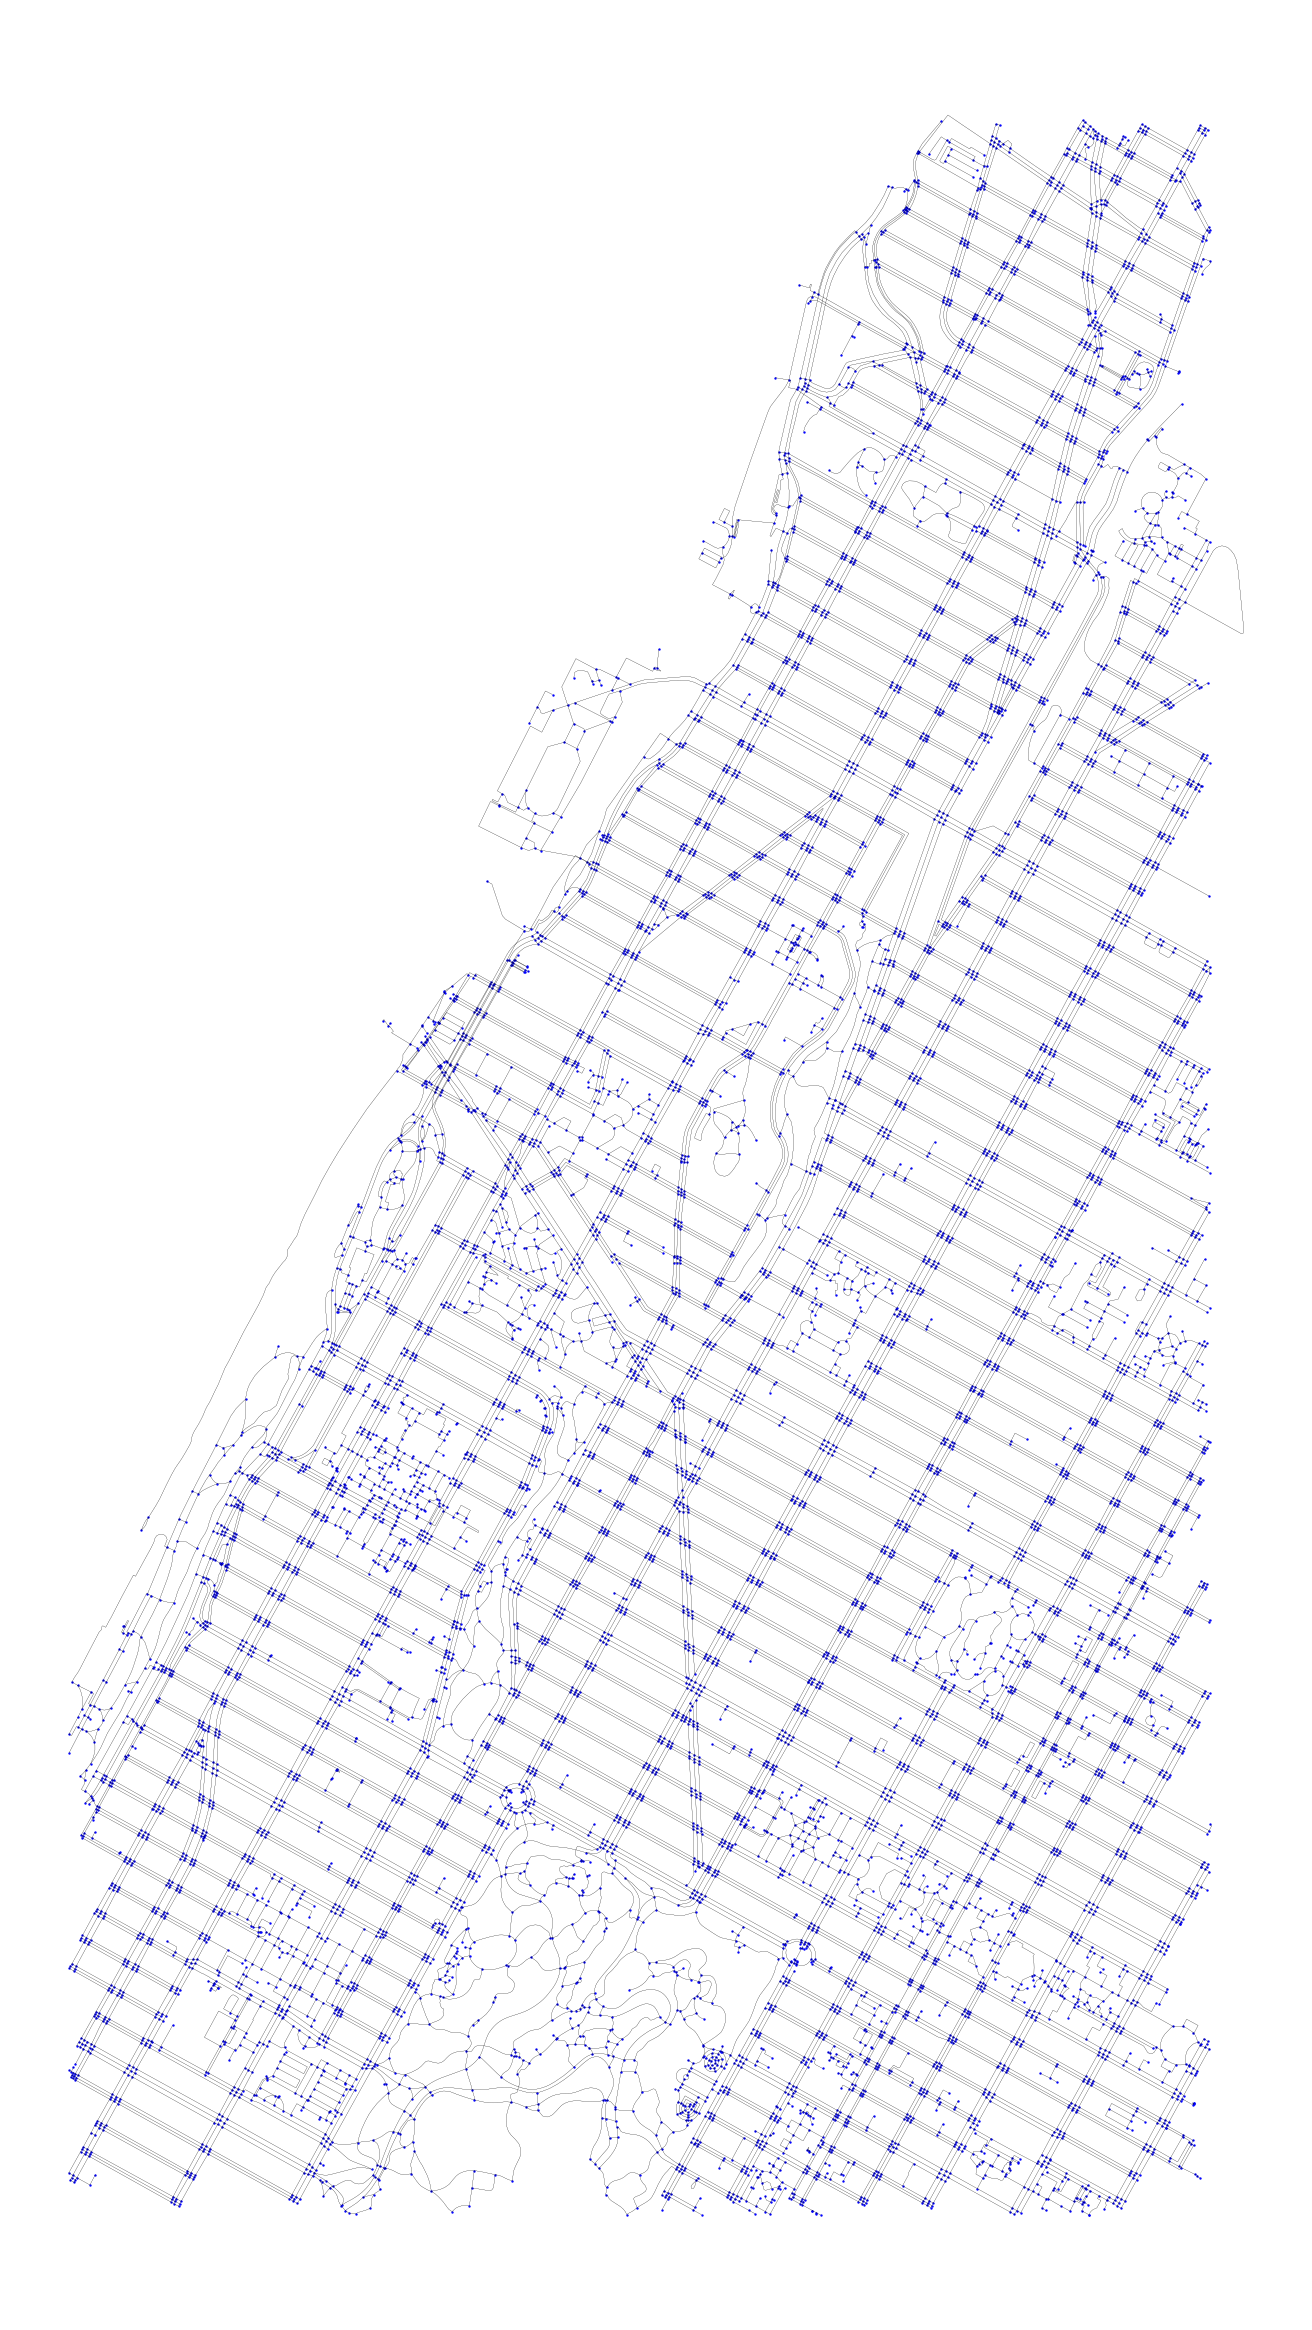

In [46]:
ax = mh_net_edges.plot(color="black", linewidth=0.1, figsize=(30, 30))
mh_network_nodes.plot(ax=ax, color="blue", markersize=0.5).set_axis_off()

In [57]:
sample_1= mh_buildings.geometry.iloc[0]

In [58]:
print(sample_1)

POINT (-73.96568703 40.80395345)


In [59]:
distance=gdf_subways.distance(sample_1)

In [60]:
nearest_index=distance.idxmin()

In [61]:
nearest_index

np.int64(19)

In [62]:
nearest_subway=gdf_subways.loc[nearest_index, 'geometry']

In [63]:
print(nearest_subway)

POINT (-73.966847 40.803967)


In [64]:
orig = ox.distance.nearest_nodes(mh_network, sample_1.x, sample_1.y)

In [65]:
dest = ox.distance.nearest_nodes(mh_network,nearest_subway.x, nearest_subway.y)

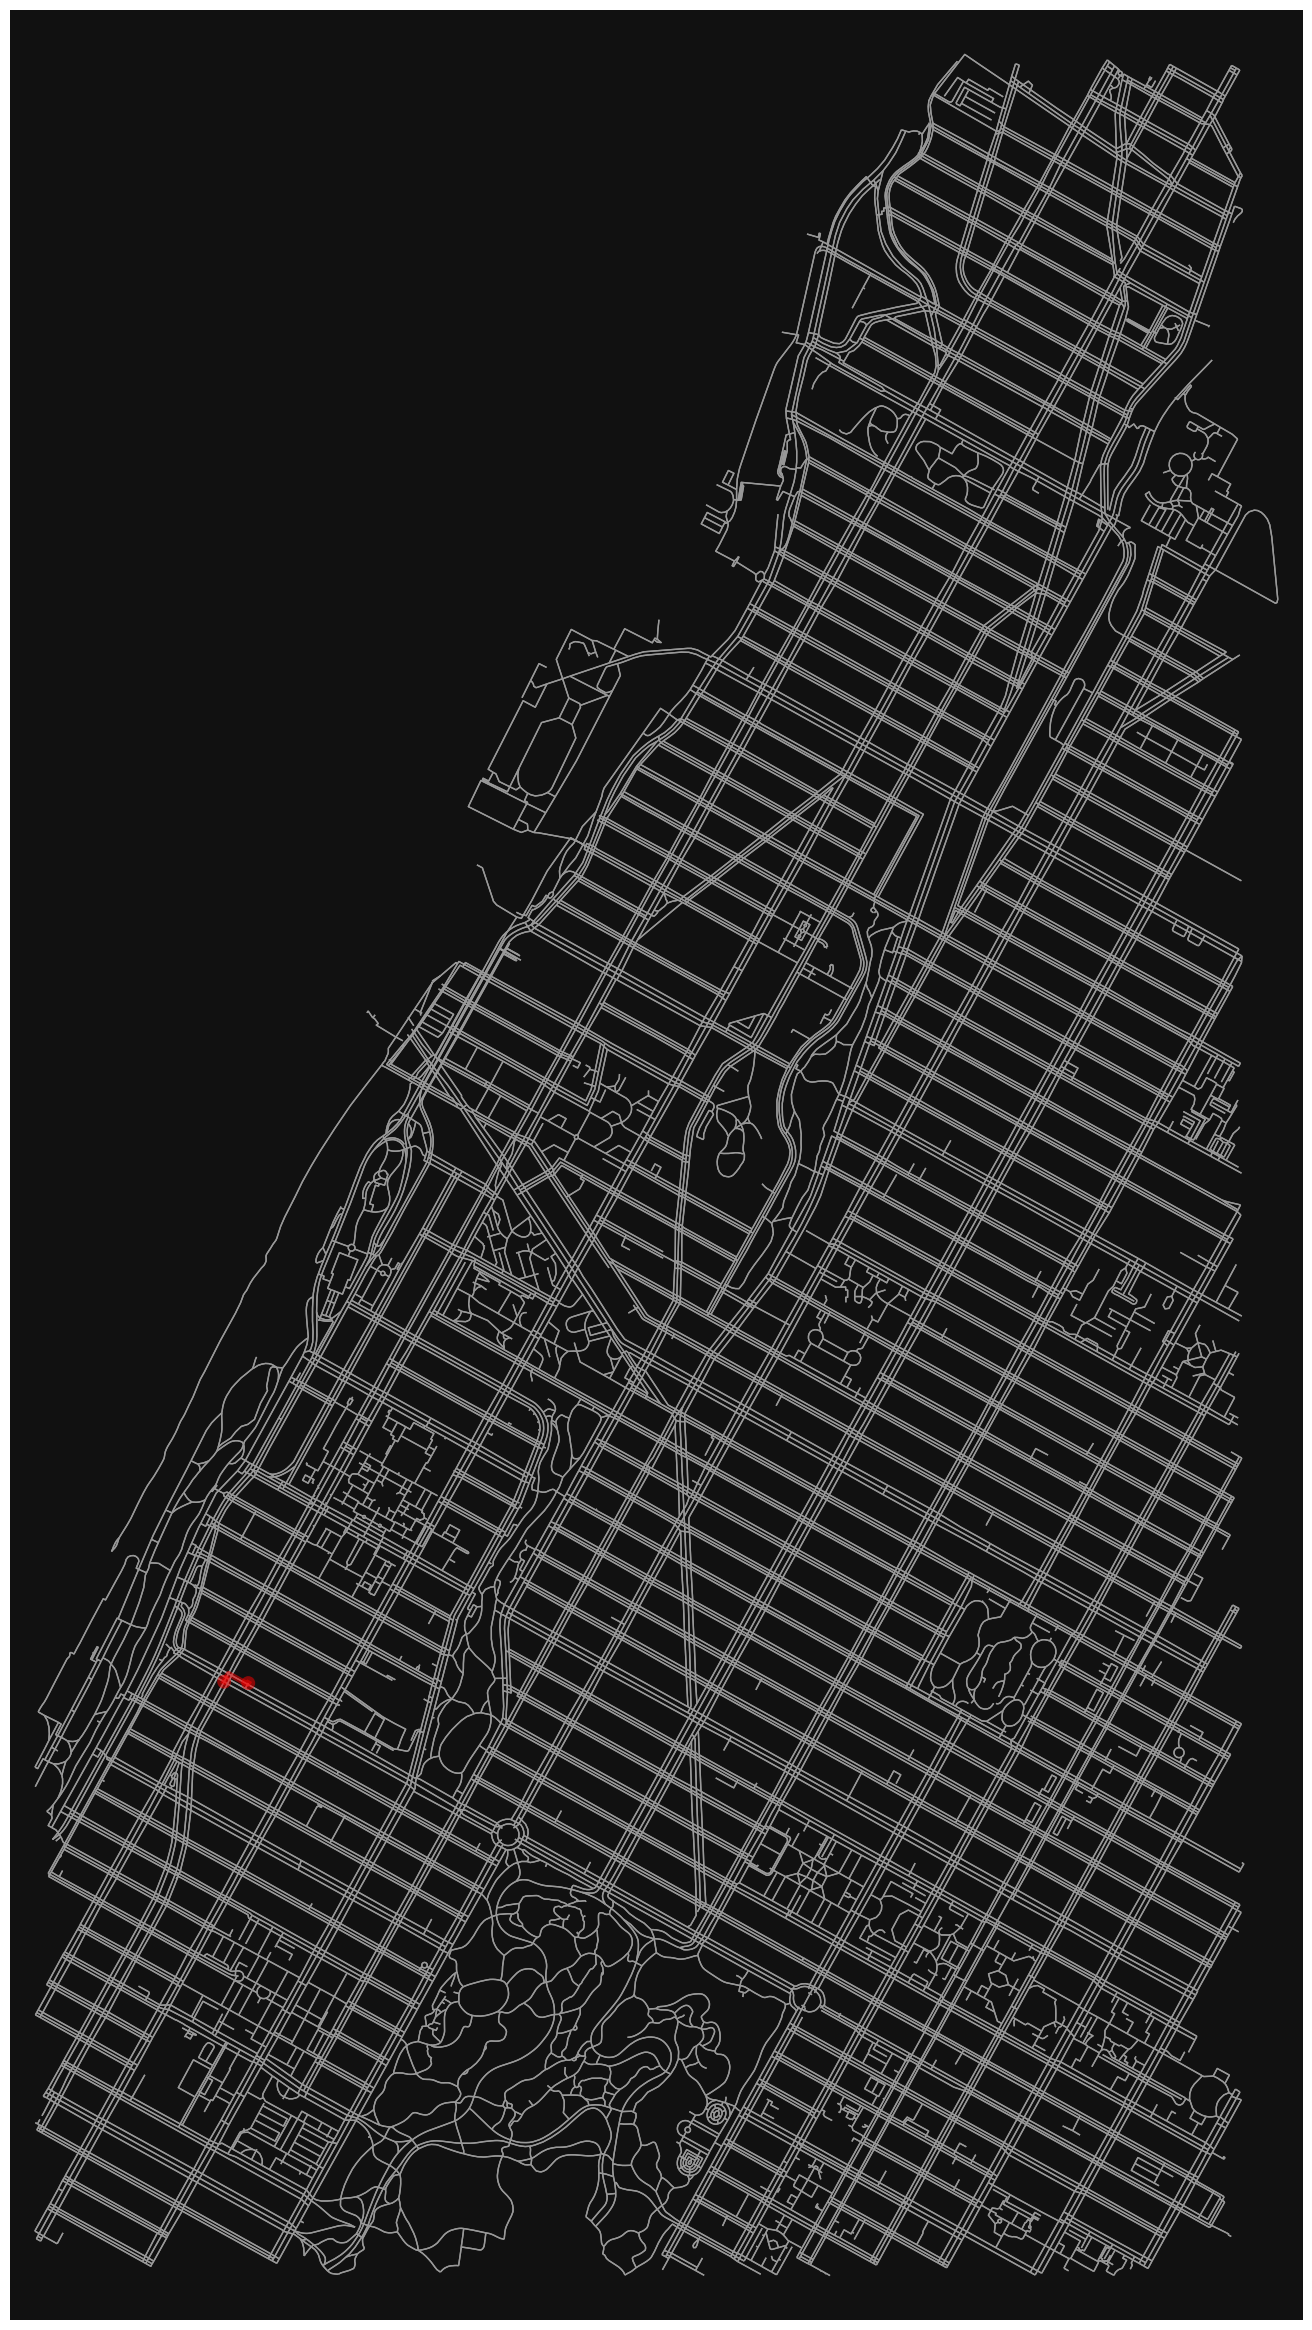

In [67]:
route = ox.shortest_path(mh_network, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(mh_network, route, node_size=0,figsize=(30,30))